You can find the article here: https://www.datainsightonline.com/post/machine-learning-concepts-k-means-clustering

In [18]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq, whiten
import matplotlib.image as img
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
image = img.imread('/content/drive/MyDrive/Data science project/red.png')
print(image.shape)

(1365, 2400, 4)


In [21]:
r = []
g = []
b = []
for row in image:
    for temp_r, temp_g, temp_b, temp in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [22]:
pixels = pd.DataFrame({'red':r,
                       'blue': b,
                       'green':g})
pixels.head()

,red,blue,green
0,1.0,0.215686,0.533333
1,1.0,0.215686,0.533333
2,1.0,0.215686,0.533333
3,1.0,0.215686,0.533333
4,1.0,0.215686,0.533333


In [23]:
# Scale wage and value
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,1.0,0.215686,0.533333,2.9872,3.039735,3.048177
1,1.0,0.215686,0.533333,2.9872,3.039735,3.048177
2,1.0,0.215686,0.533333,2.9872,3.039735,3.048177
3,1.0,0.215686,0.533333,2.9872,3.039735,3.048177
4,1.0,0.215686,0.533333,2.9872,3.039735,3.048177


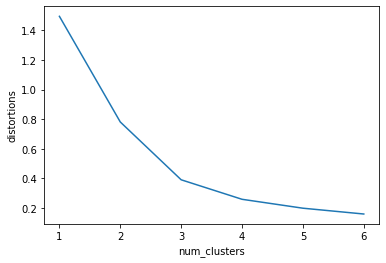

In [24]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)
    
# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
cluster_centers, _ = kmeans(pixels[['scaled_red','scaled_blue','scaled_green']],3)

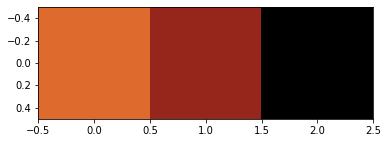

In [ ]:
colors = []

# Get standard deviations of each color
r_std,g_std,b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
 
    # Convert each standardized value to scaled value
    colors.append((
    red_scaled * r_std, 
    green_scaled * g_std, 
    blue_scaled * b_std 
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()